<a href="https://colab.research.google.com/github/sahshubham/Deep-Learning/blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 162MB/s]
100% 1.06G/1.06G [00:08<00:00, 129MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 108ms/step - loss: 1.5835 - accuracy: 0.5983 - val_loss: 0.7792 - val_accuracy: 0.6376
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5672 - accuracy: 0.7157 - val_loss: 0.4992 - val_accuracy: 0.7566
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4898 - accuracy: 0.7647 - val_loss: 0.4687 - val_accuracy: 0.7760
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4350 - accuracy: 0.7976 - val_loss: 0.4632 - val_accuracy: 0.7796
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3848 - accuracy: 0.8299 - val_loss: 0.4446 - val_accuracy: 0.7888
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3186 - accuracy: 0.8621 - val_loss: 0.4264 - val_accuracy: 0.8106
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2526 - accuracy: 0.8946 - val_loss: 0.5630 - val_ac

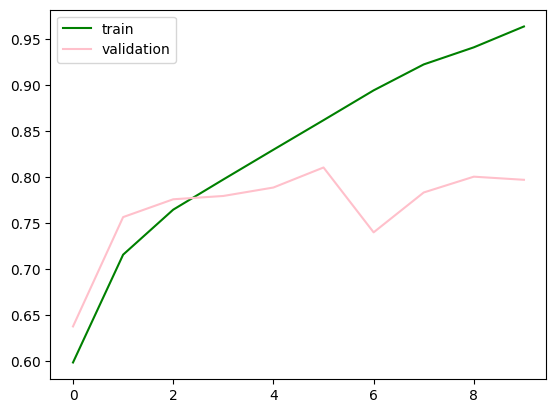

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='pink',label='validation')
plt.legend()
plt.show()

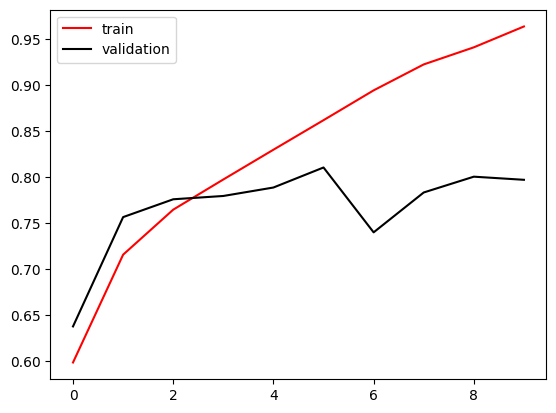

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()

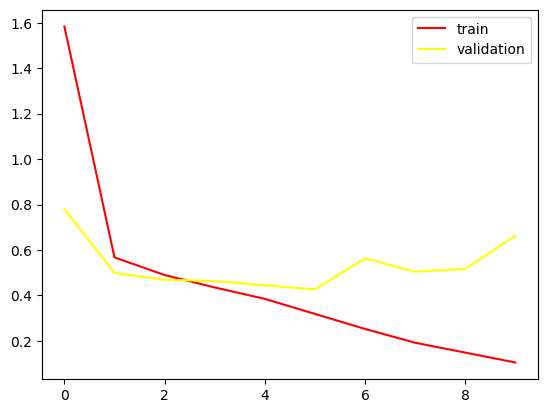

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='yellow',label='validation')
plt.legend()
plt.show()

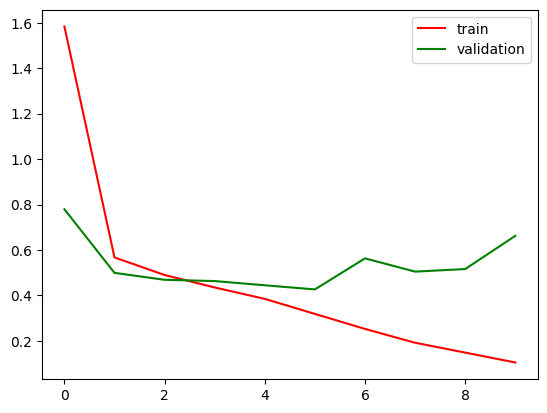

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10.jpg')

Test_img: [[[ 39  30  26]
  [ 37  28  24]
  [ 32  23  19]
  ...
  [155 158 126]
  [154 157 125]
  [154 157 125]]

 [[ 42  33  29]
  [ 42  33  29]
  [ 39  30  26]
  ...
  [155 158 126]
  [154 157 125]
  [153 156 124]]

 [[ 43  34  30]
  [ 47  38  34]
  [ 48  39  35]
  ...
  [156 159 127]
  [155 158 126]
  [153 156 124]]

 ...

 [[114 151 165]
  [110 149 163]
  [103 142 156]
  ...
  [  6 170 175]
  [  6 166 172]
  [  2 160 166]]

 [[111 146 160]
  [108 145 159]
  [102 139 153]
  ...
  [  2 171 175]
  [  3 167 172]
  [  0 161 166]]

 [[105 140 154]
  [103 140 154]
  [ 99 136 150]
  ...
  [  2 171 175]
  [  3 167 172]
  [  0 161 166]]]


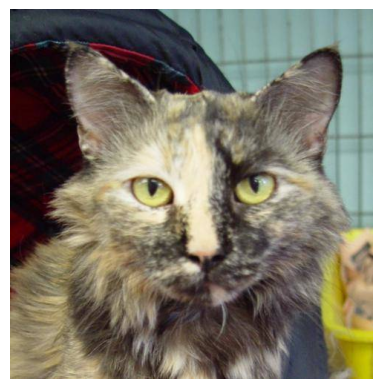

In [ ]:
# Convert BGR to RGB
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img_rgb)
plt.axis('off')  # Turn off axis
print("Test_img:", test_img)
plt.show()

In [ ]:
test_img.shape

(499, 489, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 381ms/step


array([[1.]], dtype=float32)